# Evaluator
This notebook takes a repository of generative modules for CIFAR-10 and evaluates them on effectiveness. 
We report metrics along with displaying 10 examples for qualitative analysis. The report takes in multiple
modules and compares them side by side.

In [8]:
# imports
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict

## Real Images
Load up 10 samples of real images from the dataset and display

In [3]:
def unpickle(f: str) -> Dict:
    with open(f, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d

In [7]:
# Path to the extracted CIFAR-10 data
data_dir = 'data/cifar-10-batches-py/'

# Load all training batches
images = []
file_names = [f"data_batch_{i}" for i in range(1, 6)] + ["test_batch"]
for fname in file_names:
    batch_file = os.path.join(data_dir, fname)
    batch_data = unpickle(batch_file)
    images.append(batch_data[b'data'])

# Combine all batches
images = np.vstack(images)

# Reshape and transpose
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f"Total number of images: {len(images)}")

Total number of images: 60000


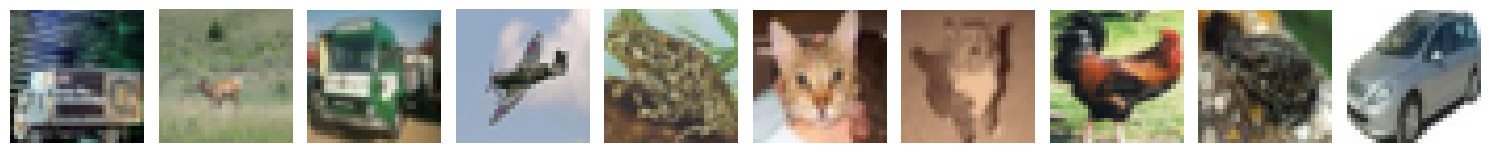

In [11]:
def show_random_images(images: np.ndarray, num_images=10):
    indices = np.random.choice(len(images), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    for i, idx in enumerate(indices):
        axes[i].imshow(images[idx])
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

show_random_images(images)